This notebok is the fifth of 5 notebooks in total.

**Notebook 5 of 5**

### `EDA`, `Data Preparation`, `Clustering`, `Regression`, **`Classification`**

#### Students in Group 15:

Jake Brady - 19238428

Anirudh Verma - 23120231

Sakina Padghawala - 23011823

Soumadip Patra - 23168471

Tanmay Srivastava - 23118067

**All Students in the group contributed equally**

#### **Layout of Notebook:**
-  0. Import required libraries & Load Dataset
-  1. Data Preparation
-  2. Model Training
-  3. Models Evaluation
-  4. Models Comparison with Evaluation metrics
-  5. Conclusion and Final Model
       - *Saving the trained model in model directory*

## 0. Import required libraries & Load Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler)
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter("ignore")
from sklearn import set_config
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import necessary classifiers
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support

# Import libraries for GridSearchCV (optional)
from sklearn.model_selection import GridSearchCV

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
 
# regression algorithms6
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv("./prepped_data.csv")

In [2]:
df.head(5)

,Unnamed: 0,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh_categorical,isWeekend,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,-0.048501,-0.023247,0.000000,0.0,-0.774550,0.000000,-0.791667,0,False,False,True,False,False,False,False
1,1,-0.080181,-0.094848,0.000000,0.0,-0.686692,0.000000,-0.645833,0,False,False,True,False,False,False,False
2,2,-0.080181,-0.123921,0.000000,0.0,-0.578460,0.000000,-0.520833,0,False,False,True,False,False,False,False
3,3,-0.057074,-1.074812,1.972347,0.0,0.302350,-505.662402,-0.166667,0,False,False,True,False,False,False,False
4,4,-0.052760,-1.074812,2.015038,0.0,0.302350,-516.274439,-0.125000,0,False,False,True,False,False,False,False


In [3]:
df.describe()

,Unnamed: 0,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh_categorical
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,0.374880,0.060658,0.509052,0.458881,-0.249905,-100.564471,-0.004043,0.393607
std,632.342866,0.540288,0.754812,0.819185,0.556309,0.575338,196.752845,0.574542,0.488661
min,0.000000,-0.138389,-1.074812,0.000000,0.000000,-1.620621,-603.404485,-1.000000,0.000000
25%,547.250000,-0.082851,-0.254582,0.000000,0.000000,-0.720314,-1.000000,-0.500000,0.000000
50%,1094.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1641.750000,0.917149,0.745418,1.000000,1.000000,0.279686,0.000000,0.500000,1.000000
max,2189.000000,1.580246,1.741579,2.316849,1.518294,0.302350,0.000000,0.979167,1.000000


In [4]:
if 'Usage_kWh' in df.columns:
    df = df.drop(columns='Usage_kWh', axis=0)
df.head()

,Unnamed: 0,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh_categorical,isWeekend,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday
0,0,-0.023247,0.000000,0.0,-0.774550,0.000000,-0.791667,0,False,False,True,False,False,False,False
1,1,-0.094848,0.000000,0.0,-0.686692,0.000000,-0.645833,0,False,False,True,False,False,False,False
2,2,-0.123921,0.000000,0.0,-0.578460,0.000000,-0.520833,0,False,False,True,False,False,False,False
3,3,-1.074812,1.972347,0.0,0.302350,-505.662402,-0.166667,0,False,False,True,False,False,False,False
4,4,-1.074812,2.015038,0.0,0.302350,-516.274439,-0.125000,0,False,False,True,False,False,False,False


In [5]:
df['Usage_kWh_categorical'].value_counts()

Usage_kWh_categorical
0    1328
1     862
Name: count, dtype: int64

In [6]:
X = df.drop("Usage_kWh_categorical", axis=1)  # Features
y = df["Usage_kWh_categorical"]  # Target variable


## 1. Data Preparation


#### While this step was already performed in Data Preparation, it is done again to maintain consistency and integrity.

In [7]:
columns_No_Outliers_skewed = ['Lagging_Current_Power_Factor','NSM']
columns_Outliers_skewed = ['CO2', 'isWeekend', 'Monday', 'Saturday','Thursday', 'Tuesday', 'Wednesday', 'Leading_Current_Power_Factor', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']

#### A check to ensure that all columns are accounted for and classified

In [8]:
len(columns_No_Outliers_skewed) + len(columns_Outliers_skewed)  == X.shape[1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            2190 non-null   int64  
 1   Lagging_Current_Reactive_Power_kVarh  2190 non-null   float64
 2   Leading_Current_Reactive_Power_kVarh  2190 non-null   float64
 3   CO2                                   2190 non-null   float64
 4   Lagging_Current_Power_Factor          2190 non-null   float64
 5   Leading_Current_Power_Factor          2190 non-null   float64
 6   NSM                                   2190 non-null   float64
 7   Usage_kWh_categorical                 2190 non-null   int64  
 8   isWeekend                             2190 non-null   bool   
 9   Friday                                2190 non-null   bool   
 10  Monday                                2190 non-null   bool   
 11  Saturday         

### Building the preprocessing pipeline by using Pipeline and ColumnTransformer as follows

In [9]:
No_Outliers_skewed_pipeline = Pipeline(
    steps = [
        ("log_transform", FunctionTransformer(np.cbrt)), 
        ("scaler", MinMaxScaler())
    ]
)

Outliers_skewed_pipeline = Pipeline(
    steps = [
        ("log_transform", FunctionTransformer(np.cbrt)), 
        ("scaler", RobustScaler())
    ]
)



preprocess_pipeline = ColumnTransformer(
    transformers = [
        ("No_Outliers_skewed", No_Outliers_skewed_pipeline, columns_No_Outliers_skewed),    
        ("Outliers_skewed", Outliers_skewed_pipeline, columns_Outliers_skewed),
        
    ],
    remainder="passthrough" # note there are no remaining columns in this example
)

### Spliting the dataset into a training and test sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Model Training
#### Using   KNN, Random Forest, SVN, Naive Bayes & MLP Classifier 

### KNN

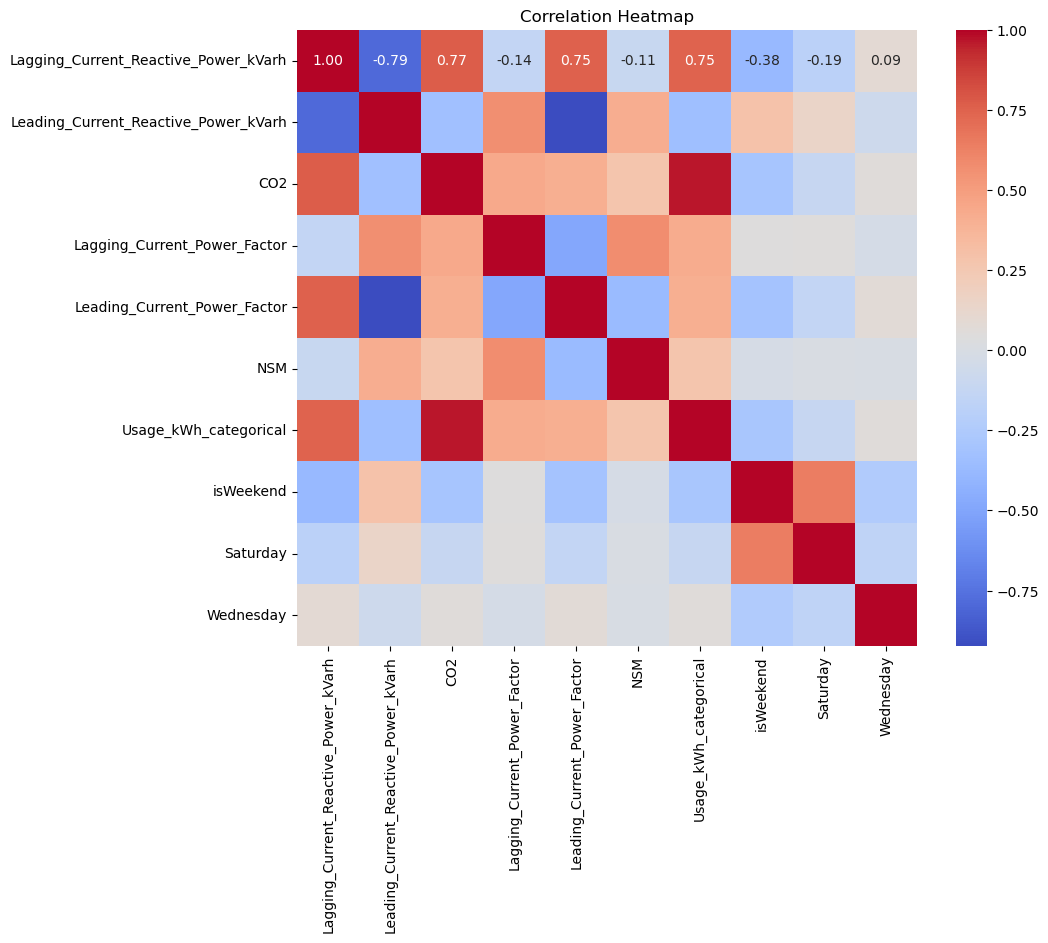

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded
# Calculate the correlation matrix
df2=df.drop(['Unnamed: 0','Friday','Monday','Thursday','Tuesday'], axis=1)
corr = df2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### We see that Lagging_Current_Reactive_Power_kVarh', 'CO2','NSM', 'Leading_Current_Power_Factor are some of the deepest correlated features and hence will be using those in our classification models.


In [12]:
#To also make an educated guess about the most important features
# Fit a Random Forest model to the training data
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Getting feature importances 
importances = rf.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]


n_features = 5 # Number of features to select
top_n_indices = sorted_indices[:n_features]
top_n_features = X_train.columns[top_n_indices]

feature_selector = SelectFromModel(rf, prefit=True)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

print(f"Top {n_features} features: {top_n_features.tolist()}")

Top 5 features: ['CO2', 'Lagging_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 'NSM', 'Leading_Current_Reactive_Power_kVarh']


#### This further validates our focus

In [13]:
class FeatureSelector:
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.features]

    def set_params(self, **kwargs):
        self.features = kwargs.get("features", self.features)
        return self

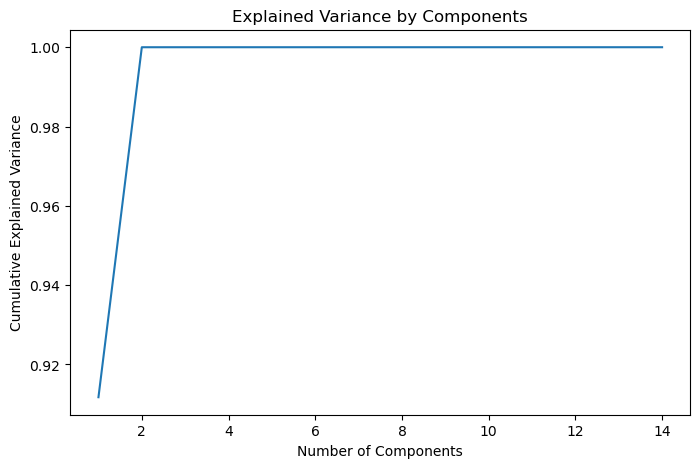

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit PCA on the standardized data
pca.fit(X)

# Plot the explained variance to find the best number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

# Choose the number of components that explain the desired amount of variance
# For example, to retain 95% of the variance, find the number of components that cumulatively explain at least 95%
n_components = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1

# Initialize PCA with the chosen number of components
pca = PCA(n_components=n_components)

# Fit and transform the standardized data
X_pca = pca.fit_transform(X)

# Now X_pca contains the reduced number of features

#### The graph indicates n_components to be between 2 to 4. 

#### Since Leading_Current_Power could still be noise. We will throw it in the GridCV and let it decide.

In [15]:
from sklearn.decomposition import PCA

# Define pipeline with feature selector, PCA, and KNN
knn_pipeline = Pipeline([
    ('feature_selector', FeatureSelector(features=['Lagging_Current_Reactive_Power_kVarh', 'CO2','NSM','Leading_Current_Reactive_Power_kVarh'])),
    ('pca', PCA(n_components=4)),  # Reduce dimensionality to 2 components
    ('knn', KNeighborsClassifier(n_jobs=-1))
])



In [16]:
set_config(display="diagram")
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_selector',
                 <__main__.FeatureSelector object at 0x000001FCF0C613D0>),
                ('pca', PCA(n_components=4)),
                ('knn', KNeighborsClassifier(n_jobs=-1))])

In [17]:

param_grid = {
    'feature_selector__features': [
        ['Lagging_Current_Reactive_Power_kVarh', 'CO2','NSM'],  # exclude Leading_Current_Power_Factor
        ['Lagging_Current_Reactive_Power_kVarh', 'CO2','NSM', 'Leading_Current_Power_Factor']  # include Leading_Current_Power_Factor
    ],
    'knn__n_neighbors': [3, 5, 10, 15, 20],
    'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance']
}

# Perform grid search with the updated pipeline and parameter grid
search = GridSearchCV(knn_pipeline, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train) 

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)


if 'Leading_Current_Power_Factor' in search.best_params_['feature_selector__features']:
    print("Including Leading_Current_Power_Factor is better.") 
else:
    print("Excluding Leading_Current_Power_Factor is better.")

Best CV score = 0.990:
Best parameters:  {'feature_selector__features': ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM', 'Leading_Current_Power_Factor'], 'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
Including Leading_Current_Power_Factor is better.


In [18]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, confusion_matrix

knn_model = search.best_estimator_

y_pred = knn_model.predict(X_test)

y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

roc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_score = search.best_score_

print("ROC score: ", roc_score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 score: ", f1)
print("CV score: ", cv_score)



ROC score:  0.9889717600560973
Accuracy:  0.9794520547945206
Precision:  0.9800383302873963
F1 score:  0.9794923821818892
CV score:  0.9897240537240538


### Random Forest

In [19]:
# create the pipeline
random_forest_pipeline = Pipeline(steps=[('preprocess', preprocess_pipeline),
    ("random_forest", RandomForestClassifier())
])


In [20]:
set_config(display="diagram")
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('No_Outliers_skewed',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Lagging_Current_Power_Factor',
                                                   'NSM']),
                                                 ('Outliers_skewed',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['CO2', 'isWeekend', 'Monday',
                                                   'Saturday', 'Thursday',
                                                   'Tuesday', 'Wednesday',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh'])])),
                ('random_forest', RandomForestClassifier())])

In [21]:
# Define parameter grid for GridSearchCV
pipeline_rf = Pipeline([
    ('feature_selector', FeatureSelector(features=['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM'])),
    ('rf', RandomForestClassifier())
])
param_grid_rf = {
    'feature_selector__features': [
        ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM'],  # exclude Leading_Current_Power_Factor
        ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM', 'Leading_Current_Power_Factor']  # include Leading_Current_Power_Factor
    ],
    'rf__n_estimators': [10, 30],
    'rf__max_depth': [5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 5]
}

pipeline_rf.fit(X_train, y_train)

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best model for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Get the accuracy of the best model for Random Forest
accuracy_rf = grid_search_rf.best_score_

# Get the ROC AUC score of the best model for Random Forest
y_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)


# Check which option is better
if 'Leading_Current_Power_Factor' in best_params_rf['feature_selector__features']:
    print("Including Leading_Current_Power_Factor is better.")
else:
    print("Excluding Leading_Current_Power_Factor is better.")

print("Random Forest Results with a feature selectore:")
print("Best parameters: ", grid_search_rf.best_params_)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {auc_rf:.4f}")
print("Best CV score = %0.3f:" % search.best_score_)

Including Leading_Current_Power_Factor is better.
Random Forest Results with a feature selectore:
Best parameters:  {'feature_selector__features': ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM', 'Leading_Current_Power_Factor'], 'rf__max_depth': 5, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 10}
Accuracy: 0.9914
AUC-ROC: 0.9991
Best CV score = 0.990:


In [22]:
random_forest_model = grid_search_rf.best_estimator_

y_pred = random_forest_model.predict(X_test)

y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

roc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_score = grid_search_rf.best_score_

print("ROC score: ", roc_score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 score: ", f1)
print("CV score: ", cv_score)

ROC score:  0.9991181657848325
Accuracy:  0.9794520547945206
Precision:  0.9800383302873963
F1 score:  0.9794923821818892
CV score:  0.9914399674399675


### SVM

In [23]:
# Define pipeline with feature selector and SVM
pipeline = Pipeline([
        ('feature_selector', FeatureSelector(features=['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM'])),
        ('svm', SVC(probability=True))
    ])

In [24]:
set_config(display="diagram")
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_selector',
                 <__main__.FeatureSelector object at 0x000001FCF0C0A590>),
                ('svm', SVC(probability=True))])

In [25]:
param_grid = {
    'feature_selector__features': [
        ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM'],  # exclude Leading_Current_Power_Factor
        ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM', 'Leading_Current_Power_Factor']  # include Leading_Current_Power_Factor
    ],
    'svm__C': [0.1, 1],
    'svm__kernel': ['linear','rbf'],
    
}
        
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svm_modelf = grid_search.best_estimator_
best_svm_params = grid_search.best_params_

# Get the accuracy of the best model
accuracy = grid_search.best_score_

# Get the ROC AUC score of the best model
y_pred_proba = best_svm_modelf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)


# Check which option is better
if 'Leading_Current_Power_Factor' in best_svm_params['feature_selector__features']:
    print("Including Leading_Current_Power_Factor is better.")
else:
    print("Excluding Leading_Current_Power_Factor is better.")

print("Best SVM Results with a feature selectore:")
print("Best Parameters:", best_svm_params)
print("Accuracy:", accuracy)
print(f"AUC-ROC: {auc:.4f}")
print("Best CV score = %0.3f:" % search.best_score_)

Including Leading_Current_Power_Factor is better.
Best SVM Results with a feature selectore:
Best Parameters: {'feature_selector__features': ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM', 'Leading_Current_Power_Factor'], 'svm__C': 0.1, 'svm__kernel': 'linear'}
Accuracy: 0.9908685388685388
AUC-ROC: 0.9955
Best CV score = 0.990:


In [26]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, confusion_matrix

SVMmodel = grid_search.best_estimator_

y_pred = SVMmodel.predict(X_test)
y_pred_proba = SVMmodel.predict_proba(X_test)[:, 1]

roc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_score = grid_search.best_score_

print("ROC score: ", roc_score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 score: ", f1)
print("CV score: ", cv_score)

ROC score:  0.995516457363847
Accuracy:  0.9726027397260274
Precision:  0.9737692301710306
F1 score:  0.9726750875698302
CV score:  0.9908685388685388


### MLP Classifier

In [27]:
mlp_pipeline = Pipeline(steps=[('preprocess', preprocess_pipeline),
                               ('mlp', MLPClassifier())
                            ])

In [28]:
set_config(display="diagram")
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('No_Outliers_skewed',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Lagging_Current_Power_Factor',
                                                   'NSM']),
                                                 ('Outliers_skewed',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['CO2', 'isWeekend', 'Monday',
                                                   'Saturday', 'Thursday',
                                                   'Tuesday', 'Wednesday',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh'])])),
                ('mlp', MLPClassifier())])

In [29]:
param_grid = {
    'mlp__learning_rate_init' : [0.001,0.01,0.1],
    'mlp__max_iter': [200, 300, 400],
    'mlp__activation': ['logistic', 'relu']
}

search = GridSearchCV(mlp_pipeline, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
MLP_best_params = search.best_params_
MLP_best_model = search.best_estimator_

Best CV score = 0.979:
Best parameters:  {'mlp__activation': 'logistic', 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 300}


In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, confusion_matrix

MLP_best_model = search.best_estimator_

y_pred = MLP_best_model.predict(X_test)
y_pred_proba = MLP_best_model.predict_proba(X_test)[:, 1]

roc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_score = search.best_score_

print("ROC score: ", roc_score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 score: ", f1)
print("CV score: ", cv_score)

ROC score:  0.9973438728458809
Accuracy:  0.9748858447488584
Precision:  0.9754876194789022
F1 score:  0.9749351337778646
CV score:  0.9788897028897029


### Naive Bayes Classifier

In [31]:
nvb_pipeline = Pipeline(steps=[('preprocess', preprocess_pipeline), ('nb', GaussianNB())])

In [32]:
set_config(display="diagram")
nvb_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('No_Outliers_skewed',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Lagging_Current_Power_Factor',
                                                   'NSM']),
                                                 ('Outliers_skewed',
                                                  Pipeline(steps=[('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'cbrt'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['CO2', 'isWeekend', 'Monday',
                                                   'Saturday', 'Thursday',
                                                   'Tuesday', 'Wednesday',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh'])])),
                ('nb', GaussianNB())])

In [33]:
param_grid = {
    
}

search = GridSearchCV(nvb_pipeline, param_grid, n_jobs=-1, cv=5, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
NB_best_params = search.best_params_
NB_best_model = search.best_estimator_

Best CV score = 0.986:
Best parameters:  {}


In [34]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, confusion_matrix

NB_best_model = search.best_estimator_

y_pred = NB_best_model.predict(X_test)
y_pred_proba = NB_best_model.predict_proba(X_test)[:, 1]

roc_score = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cv_score = search.best_score_

print("ROC score: ", roc_score)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1 score: ", f1)
print("CV score: ", cv_score)

ROC score:  0.9967701493805912
Accuracy:  0.9771689497716894
Precision:  0.9776181989271792
F1 score:  0.977208103630694
CV score:  0.9863019943019943


## 3. Models Evaluation
The evaluation metrics are:
  - accuracy
  - precisions
  - recall
  - F1-score
  - TPR (true positive rate)
  - AUC (area under the ROC curve)

In [35]:
random_forest_pipeline.fit(X_train, y_train)
print("Random Forest Model Trained!")
pipeline.fit(X_train, y_train)
print("SVM Model Trained!")
SVMmodel.fit(X_train, y_train)
print("Best SVM Model Trained!")
knn_pipeline.fit(X_train, y_train)
print("KNN Model Trained!")
mlp_pipeline.fit(X_train, y_train)
print("MLP Model Trained!")
nvb_pipeline.fit(X_train, y_train)
print("NVB Model Trained!")

# Evaluate Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_pipeline.predict(X_test))
random_forest_precision = precision_score(y_test, random_forest_pipeline.predict(X_test))
random_forest_recall = recall_score(y_test, random_forest_pipeline.predict(X_test))
random_forest_f1 = f1_score(y_test, random_forest_pipeline.predict(X_test))
random_forest_auc = roc_auc_score(y_test, random_forest_pipeline.predict_proba(X_test)[:, 1])

# Evaluate SVM (similar to Random Forest)
svm_accuracy = accuracy_score(y_test, pipeline.predict(X_test))
svm_precision = precision_score(y_test, pipeline.predict(X_test))
svm_recall = recall_score(y_test, pipeline.predict(X_test))
svm_f1 = f1_score(y_test, pipeline.predict(X_test))
svm_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])


# Evaluate KNN 
knn_pipeline_accuracy = accuracy_score(y_test, knn_pipeline.predict(X_test))
knn_pipeline_precision = precision_score(y_test, knn_pipeline.predict(X_test))
knn_pipeline_recall = recall_score(y_test, knn_pipeline.predict(X_test))
knn_pipeline_f1 = f1_score(y_test, knn_pipeline.predict(X_test))
knn_pipeline_auc = roc_auc_score(y_test, knn_pipeline.predict_proba(X_test)[:, 1])


# Evaluate MLP 
mlp_pipeline_accuracy = accuracy_score(y_test, mlp_pipeline.predict(X_test))
mlp_pipeline_precision = precision_score(y_test, mlp_pipeline.predict(X_test))
mlp_pipeline_recall = recall_score(y_test, mlp_pipeline.predict(X_test))
mlp_pipeline_f1 = f1_score(y_test, mlp_pipeline.predict(X_test))
mlp_pipeline_auc = roc_auc_score(y_test, mlp_pipeline.predict_proba(X_test)[:, 1])


# Evaluate NVB 
nvb_pipeline_accuracy = accuracy_score(y_test, nvb_pipeline.predict(X_test))
nvb_pipeline_precision = precision_score(y_test, nvb_pipeline.predict(X_test))
nvb_pipeline_recall = recall_score(y_test, nvb_pipeline.predict(X_test))
nvb_pipeline_f1 = f1_score(y_test, nvb_pipeline.predict(X_test))
nvb_pipeline_auc = roc_auc_score(y_test, nvb_pipeline.predict_proba(X_test)[:, 1])

# Evaluate the best SVM model
best_svm_accuracy = accuracy_score(y_test, SVMmodel.predict(X_test))
best_svm_precision = precision_score(y_test, SVMmodel.predict(X_test))
best_svm_recall = recall_score(y_test, SVMmodel.predict(X_test))
best_svm_f1 = f1_score(y_test, SVMmodel.predict(X_test))
best_svm_auc = roc_auc_score(y_test, SVMmodel.predict_proba(X_test)[:, 1])

# Compute Best CV score for each model
random_forest_best_score = grid_search_rf.best_score_
best_svm_best_score = grid_search.best_score_
knn_pipeline_best_score = search.best_score_
mlp_pipeline_best_score = search.best_score_
nvb_pipeline_best_score = search.best_score_
# Print the results in a clear format
print("\n")
print("Random Forest Results:")
print(f"Accuracy: {random_forest_accuracy:.4f}")
print(f"Precision: {random_forest_precision:.4f}")
print(f"Recall: {random_forest_recall:.4f}")
print(f"F1-score: {random_forest_f1:.4f}")
print(f"AUC-ROC: {random_forest_auc:.4f}")
print(f"Best CV score: {random_forest_best_score:.4f}")

# Print the results
print("\n")
print("Best SVM Results:")
print(f"Accuracy: {best_svm_accuracy:.4f}")
print(f"Precision: {best_svm_precision:.4f}")
print(f"Recall: {best_svm_recall:.4f}")
print(f"F1-score: {best_svm_f1:.4f}")
print(f"AUC-ROC: {best_svm_auc:.4f}")
print(f"Best Parameters: {best_svm_params}")
print(f"Best CV score: {best_svm_best_score:.4f}")

print("\n")
print("KNN Results:")
print(f"Accuracy: {knn_pipeline_accuracy:.4f}")
print(f"Precision: {knn_pipeline_precision:.4f}")
print(f"Recall: {knn_pipeline_recall:.4f}")
print(f"F1-score: {knn_pipeline_f1:.4f}")
print(f"AUC-ROC: {knn_pipeline_auc:.4f}")
print(f"Best CV score: {knn_pipeline_best_score:.4f}")

print("\n")
print("MLP Results:")
print(f"Accuracy: {mlp_pipeline_accuracy:.4f}")
print(f"Precision: {mlp_pipeline_precision:.4f}")
print(f"Recall: {mlp_pipeline_recall:.4f}")
print(f"F1-score: {mlp_pipeline_f1:.4f}")
print(f"AUC-ROC: {mlp_pipeline_auc:.4f}")
print(f"Best CV score: {search.best_score_:.4f}")

print("\n")
print("NVB Results:")
print(f"Accuracy: {nvb_pipeline_accuracy:.4f}")
print(f"Precision: {nvb_pipeline_precision:.4f}")
print(f"Recall: {nvb_pipeline_recall:.4f}")
print(f"F1-score: {nvb_pipeline_f1:.4f}")
print(f"AUC-ROC: {nvb_pipeline_auc:.4f}")
print(f"Best CV score: {search.best_score_:.4f}")

Random Forest Model Trained!
SVM Model Trained!
Best SVM Model Trained!
KNN Model Trained!
MLP Model Trained!
NVB Model Trained!


Random Forest Results:
Accuracy: 0.9749
Precision: 0.9495
Recall: 0.9947
F1-score: 0.9716
AUC-ROC: 0.9993
Best CV score: 0.9914


Best SVM Results:
Accuracy: 0.9726
Precision: 0.9447
Recall: 0.9947
F1-score: 0.9691
AUC-ROC: 0.9955
Best Parameters: {'feature_selector__features': ['Lagging_Current_Reactive_Power_kVarh', 'CO2', 'NSM', 'Leading_Current_Power_Factor'], 'svm__C': 0.1, 'svm__kernel': 'linear'}
Best CV score: 0.9909


KNN Results:
Accuracy: 0.9772
Precision: 0.9543
Recall: 0.9947
F1-score: 0.9741
AUC-ROC: 0.9871
Best CV score: 0.9863


MLP Results:
Accuracy: 0.9726
Precision: 0.9492
Recall: 0.9894
F1-score: 0.9689
AUC-ROC: 0.9975
Best CV score: 0.9863


NVB Results:
Accuracy: 0.9772
Precision: 0.9590
Recall: 0.9894
F1-score: 0.9740
AUC-ROC: 0.9968
Best CV score: 0.9863


## 4. Models Comparison with Evaluation metrics

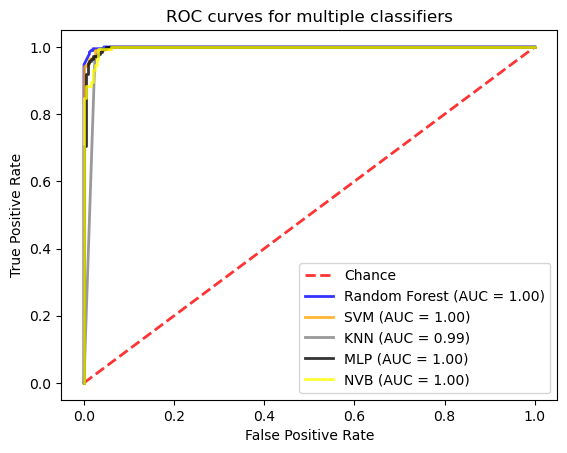

In [36]:
# Get the false positive rates and true positive rates for each model
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_pipeline.predict_proba(X_test)[:, 1])
svm_fpr, svm_tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pipeline.predict_proba(X_test)[:, 1])
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_pipeline.predict_proba(X_test)[:, 1])
nvb_fpr, nvb_tpr, _ = roc_curve(y_test, nvb_pipeline.predict_proba(X_test)[:, 1])

# Plot the ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=0.8)
plt.plot(random_forest_fpr, random_forest_tpr, lw=2, color='blue', label='Random Forest (AUC = %0.2f)' % (random_forest_auc), alpha=0.8)
plt.plot(svm_fpr, svm_tpr, lw=2, color='orange', label='SVM (AUC = %0.2f)' % (svm_auc), alpha=0.8)
plt.plot(knn_fpr, knn_tpr, lw=2, color='grey', label='KNN (AUC = %0.2f)' % (knn_pipeline_auc), alpha=0.8)
plt.plot(mlp_fpr, mlp_tpr, lw=2, color='black', label='MLP (AUC = %0.2f)' % (mlp_pipeline_auc), alpha=0.8)
plt.plot(nvb_fpr, nvb_tpr, lw=2, color='yellow', label='NVB (AUC = %0.2f)' % (nvb_pipeline_auc), alpha=0.8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

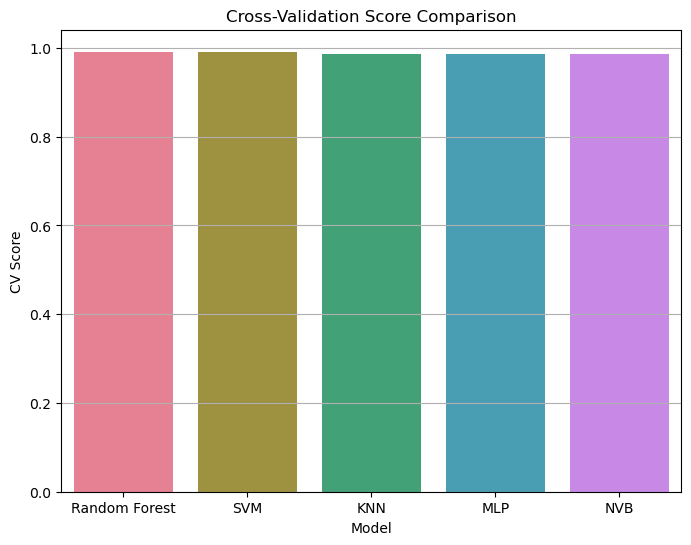

The best is Random Forest with a CV score of 0.9914


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the CV scores
df_cv_scores = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'KNN', 'MLP', 'NVB'],
    'CV Score': [random_forest_best_score, best_svm_best_score, knn_pipeline_best_score, mlp_pipeline_best_score, nvb_pipeline_best_score]
})

# Create a bar plot with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df_cv_scores, x='Model', y='CV Score', palette="husl")

# Customize the plot
plt.title('Cross-Validation Score Comparison')
plt.xlabel('Model')
plt.ylabel('CV Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
# Find the winner
winner = df_cv_scores.loc[df_cv_scores['CV Score'].idxmax()]['Model']
winner_cv_score = df_cv_scores.loc[df_cv_scores['CV Score'].idxmax()]['CV Score']

print(f'The best is {winner} with a CV score of {winner_cv_score:.4f}')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


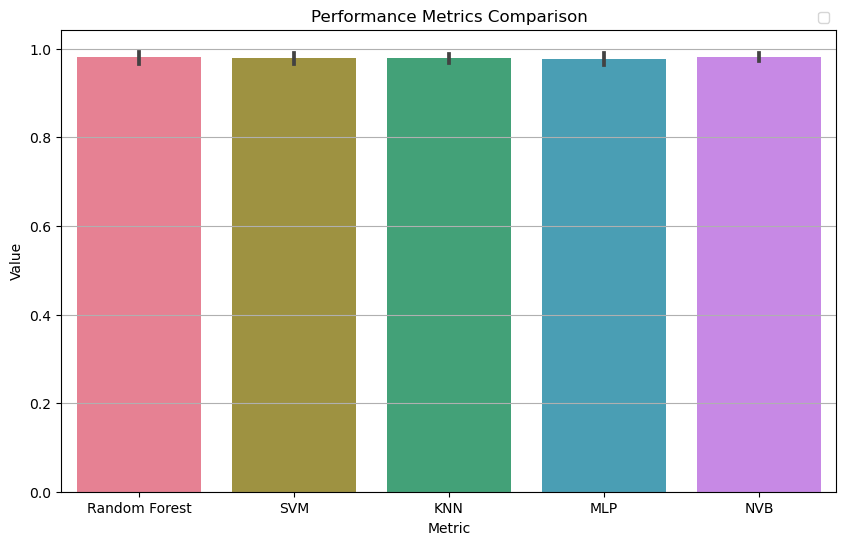

The best is NVB with an average metric value of 0.9804


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the metrics
index = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC', 'Best CV score']
df_metrics = pd.DataFrame({
    'Random Forest': [random_forest_accuracy, random_forest_precision, random_forest_recall, random_forest_f1, random_forest_auc, random_forest_best_score],
    'SVM': [best_svm_accuracy, best_svm_precision, best_svm_recall, best_svm_f1, best_svm_auc, best_svm_best_score],
    'KNN': [knn_pipeline_accuracy, knn_pipeline_precision, knn_pipeline_recall, knn_pipeline_f1, knn_pipeline_auc, knn_pipeline_best_score],
    'MLP': [mlp_pipeline_accuracy, mlp_pipeline_precision, mlp_pipeline_recall, mlp_pipeline_f1, mlp_pipeline_auc, mlp_pipeline_best_score],
    'NVB': [nvb_pipeline_accuracy, nvb_pipeline_precision, nvb_pipeline_recall, nvb_pipeline_f1, nvb_pipeline_auc, nvb_pipeline_best_score]
}, index=index)

# Create a bar plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, palette="husl")

# Customize the plot
plt.title('Performance Metrics Comparison')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
# Calculate average metric values
random_forest_avg = df_metrics['Random Forest'].mean()
svm_avg = df_metrics['SVM'].mean()
knn_avg = df_metrics['KNN'].mean()
mlp_avg = df_metrics['MLP'].mean()
nvb_avg = df_metrics['NVB'].mean()

# Find the winner
winner = ['Random Forest', 'SVM', 'KNN', 'MLP', 'NVB'][[random_forest_avg, svm_avg, knn_avg, mlp_avg, nvb_avg].index(max([random_forest_avg, svm_avg, knn_avg, mlp_avg, nvb_avg]))]
winner_avg = max([random_forest_avg, svm_avg, knn_avg, mlp_avg, nvb_avg])

print(f'The best is {winner} with an average metric value of {winner_avg:.4f}')

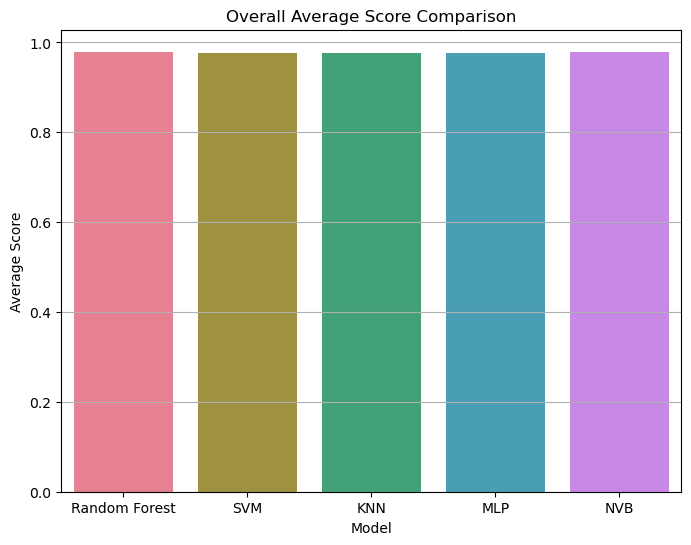

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate overall average scores
random_forest_avg = (random_forest_accuracy + random_forest_precision + random_forest_recall + random_forest_f1 + random_forest_auc) / 5
svm_avg = (best_svm_accuracy + best_svm_precision + best_svm_recall + best_svm_f1 + best_svm_auc) / 5
knn_avg = (knn_pipeline_accuracy + knn_pipeline_precision + knn_pipeline_recall + knn_pipeline_f1 + knn_pipeline_auc) / 5
mlp_avg = (mlp_pipeline_accuracy + mlp_pipeline_precision + mlp_pipeline_recall + mlp_pipeline_f1 + mlp_pipeline_auc) / 5
nvb_avg = (nvb_pipeline_accuracy + nvb_pipeline_precision + nvb_pipeline_recall + nvb_pipeline_f1 + nvb_pipeline_auc) / 5

# Create a DataFrame with the overall average scores
df_avg_scores = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'KNN', 'MLP', 'NVB'],
    'Average Score': [random_forest_avg, svm_avg, knn_avg, mlp_avg, nvb_avg]
})

# Create a bar plot with seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=df_avg_scores, x='Model', y='Average Score', palette="husl")

# Customize the plot
plt.title('Overall Average Score Comparison')
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# 5.Conclusion and Final Model

In [40]:

winner = df_avg_scores.loc[df_avg_scores['Average Score'].idxmax()]['Model']
winner_avg_score = df_avg_scores.loc[df_avg_scores['Average Score'].idxmax()]['Average Score']

print(f'The best is {winner} with an average score of {winner_avg_score:.4f}')

The best is NVB with an average score of 0.9793


### So just going by CV score, SVM/Random Forest seem to be the better models, but overall NVB seems to be the general best choice to go for

### 1. Best CV Metric implies that Random Forest would handle unseen data the best amongst all of other models
### 2. Naive Bayes's high precision and high accuracy means that in a situation where the cost of false positives is very high.

In practice, the Best CV Score is often considered more important because it gives a better indication of how well the model will perform on unseen data. However, the final choice depends on the specific context and goals of the project.

## 5.1 Saving the trained model in model directory

In [41]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
final_model = GaussianNB(**NB_best_params)

# Train the final model on the entire training set
final_model.fit(X_train, y_train)

GaussianNB()

In [42]:
filename = 'final_RF_classifier_model.sav'
pickle.dump(final_model, open(filename, 'wb'))